<a href="https://colab.research.google.com/github/plaban1981/Mitra_AI/blob/main/Copy_of_Fully_Connected_MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
# required to get plots on the Jupyter notebook

# **A friendly introduction to Deep Learning with Keras and TensorFlow**

**Resources: [Daniel Moser (UT Southwestern Medical Center)](https://github.com/AviatorMoser),[Xavier Snelgrove](https://github.com/wxs/keras-mnist-tutorial), [Yash Katariya](https://github.com/yashk2810/MNIST-Keras)**

**Adapted by**: Vishnu (Ex.Invento - IIT Madras) <br>
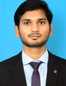

A beginner's introduction to the fundamentals of deep learning, this demo will walk through the basic steps of building **a toy model** for **classifying handwritten numbers** with accuracies surpassing **95%**. This first model will be a basic **fully-connected** neural network. In a future notebook we will be seeing a deeper network that introduces the concepts of **convolution** and pooling that performs significantly better at this task.

## **Our task for the AI**

*  What we have? *A large corpus of handwritten images and their corresponding labels*
*  Our Goal? *Make an AI to automatically learn the patterns and features from the data so that it will be capabale of correctly labelling future handwritten images*
*  Dataset source: *Handwritten digits from the MNIST database. 60k Training and 10K test images.*

We will use the **Keras Python API** with TensorFlow as the backend.

**Why Keras?** *Keras is the most easy to use the library for machine learning for beginners. Being simple helps it to bring machine learning from imaginations to reality. It provides an infrastructure that can be learned in very less time. Using Keras, you will be able to stack layers like experts.*

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

## **Importing the Necessary Python Modules**


In [2]:
import numpy as np                   # Optimized scientific computing library
import matplotlib.pyplot as plt      # For plotting
import random                        # for generating random numbers

from keras.datasets import mnist     # importing the dataset
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

## **Loading Training Data**

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [3]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
train_data, test_data = mnist.load_data()
X_train, y_train = train_data
X_test, y_test = test_data

print("Printing the shapes for validation. Format for shape : (n_elements, n_rows, n_cols)")
print(f"X_train :  {X_train.shape}, y_train :  {y_train.shape}")
print(f"X_test  :  {X_test.shape}, y_test  :  {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
Printing the shapes for validation. Format for shape : (n_elements, n_rows, n_cols)
X_train :  (60000, 28, 28), y_train :  (60000,)
X_test  :  (10000, 28, 28), y_test  :  (10000,)


**Let us plot some sample images from the training set, using Matplotlib.**

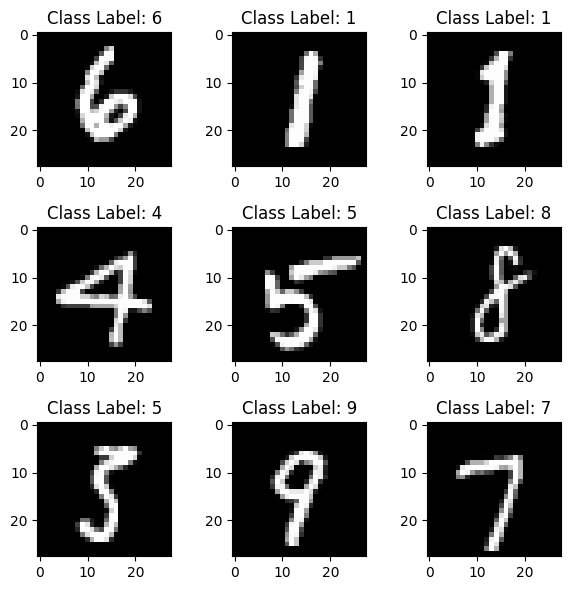

In [4]:
plt.rcParams['figure.figsize'] = (6,6) # Changing these values to Make the figures a bit bigger ("rc" params are like configuration parameters)

#Plotting some 9 samples in a 3x3 grid for data visualization
for i in range(9):
    plt.subplot(3,3,i+1)
    index = random.randint(0, len(X_train)) # random image index in the valid range
    plt.imshow(X_train[index], cmap='gray')  # color map -> gray as it is a black and white image
    plt.title(f"Class Label: {y_train[index]}")

plt.tight_layout()

Now that we have visualized how the training samples look like,

### **Let's examine a single digit a little closer, and print out the array representing the digit.**

In [6]:
index

25506

In [5]:
np.set_printoptions(linewidth=120)  # Making line width large so that the entire first row is printed as one row!

print(np.matrix(X_train[index]))    # Let us examine the pixel values of the last number from above

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   5  60  50  89 129 233 124   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7  81 176 176 176 215 254 254 254 254 254 254 18

## **Comments:**
* This array is what your computer receives and operates with.

* If we follow the non-zero pixels we can see the number!

* This is a black and white image. Here the pixel values correspond to light * intensities. Each pixel is an 8-bit integer from 0-255. 0 is full black, while  255 is full white.


* This is what we call a single-channel pixel. It's called monochrome.

* *Fun-fact! Your computer screen has three channels for each pixel: red, green, blue. Each of these channels also takes an 8-bit integer. 3 channels -- 24 bits total -- 16,777,216 possible colors!*

## **Formatting the input data layer**

* Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

* Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

**Note** : *By flattening the the matrix, we loose the connectivity information of the input pixels. i.e: The model has no idea that the pixels at (1,1) and (2,1) are adjacent pixels(vertically connected). The model we build here, makes no use of the information that adjacent pixels (horizontal/vertical/diagonal/across any direction) are similar and contain a piece of informaiton if grouped together. Keep this fact at the back of your mind, we will come back to this, when we solve the same problem using* **Convolutional Neural Networks**!

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [7]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print(f"Training matrix shape now:  {X_train.shape}")
print(f"Testing matrix shape now: {X_test.shape}")

Training matrix shape now:  (60000, 784)
Testing matrix shape now: (10000, 784)


**We then modify our classes (unique digits) to be in the one-hot format, i.e.**

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

**If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:**

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
**then it is most probable that the image is that of the digit `1`**.



In [8]:
# Converting the given y-labels to ONE HOT ENCODED VECTORS form
n_classes = 10 # number of unique digits/classes

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [10]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## **Building a 3-layer fully connected network (FCN)**

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

In [9]:
# The Sequential model is a linear stack of layers and is very common.
model = Sequential()

## **The first hidden layer**

In [11]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [12]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that artifical neuron has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))
# It is this RELU FUNCTION that brings in non-linearity to the network, which then unlocks the model to be able to generalize to literally any function,
# given a large enough network!

$$f(x) = max (0,x)$$
<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/relu.jpg?raw=1' >

In [13]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))

<img src = "https://d3i71xaburhd42.cloudfront.net/34f25a8704614163c4095b3ee2fc969b60de4698/2-Figure1-1.png" >

### **Intuition:**
If some of the nodes are randomly not available to the model for making its prediction during training phase, it means that the other nodes are forced to be able to make the right prediction, even in the absence of the missing nodes' information. This means, the information is forced to be uniformly spread across all the nodes of the network, and the neural network cannot cheat by using the information contained in one or two nodes alone for making the predictions.

## **Adding the second hidden layer**

In [14]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## **The Final Output Layer**

In [15]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [16]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))



<img src = "https://www.researchgate.net/profile/Nabi-Nabiyev-2/publication/349662206/figure/fig3/AS:995882686246913@1614448343589/Working-principles-of-softmax-function.jpg" >

### **Intuition**:
It is really a neat way of converting The activation values of Output layer into Probabilities of the image belonging to each of the classes!

In [17]:
# Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

## **Compiling the model**

* Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

* When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

* Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

* The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which the optimizer descends a gradient is called the **learning rate**.

<img src = "https://miro.medium.com/v2/resize:fit:679/1*lhEF_VbpXHW76p6KI5cycQ.gif" > <br>
This is a beautiful illustration of gradient descent.
Have a close look at this awesome GIF.

This is literally where all the **MAGIC** of **learning patterns** from **data** happens!

What **gradient descent** does is, find the direction in which each of the parameters need to be tweaked, so that, the loss will become lesser in the next iteration!

*Put very bluntly, Gradient descent is when there is an error between the expected value and the predicted value,
Each parameter, interacts with the model's loss value manually, and try to improve them for the next iteration!*

**Parameter**:  "Ohh, Sorry, for the error/mistake, may I know what changes I need to make to myself, so that I can hopefully reduce the error, the next time around?"


**Model**: Sure, if you slightly increase/decrease your value, it might reduce the total Loss of our company.


**Parameter**: Thanks, will work on it, and let's see how it goes, next time!

If all the parameters do this at the same time, and they do it in appropriate step sizes, for long enough, everything will Converge to the Global Minimum. One more nuance is that They change in proportion to their gradient value. i.e: If some parameter has a large impact on the Change in loss value, it will be changed more at this time-step, so that we are leveraging its ability to reduce the loss faster.   

* **But first**, our main task is make sure that the **LOSS FUNCTION** actually corresponds to some scalar that is a measure of **how well/bad** our **model** is **performing** at the task we intend it to perform. In this case, our loss function captures, how confidently our model is able to predict the right numbers, which is the behaviour we incentivise our Model by rewarding it when it is good. And punishing with heavy fines when the loss is bad!

* So, if we are able to automatically incentivise(define it once, sit back, relax!) Good behaviour and automatically punish bad behaviour using appropriate metrics (**LOSS FUNCTIONS**) that are **true** to the **essence** of **"what We want to achieve**", then

* **Just providing correctly labelled data is enough for the model to automatically learn how to get Good at that particular task**, by trying to predict the labels of the training data with randomly initialized weights ->  failing -> automatically tweaking it's weights to be better suited to do it in the next iteration, using Gradient Descent!
*  Eventually, successfully learning the underlying features of the data that we want it to learn!




<img src = "https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" >

***So are smaller learning rates better? Not quite! It's important for an optimizer not to get stuck in local minima while neglecting the global minimum of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.***

<img src = "https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/complicated_loss_function.png?raw=1" >

In [18]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#If you want to understand how categorical Cross entropy works check out this cool video from StatQuest : https://youtu.be/6ArSys5qHAU


### **Comments:**
* We use **Adam optimizer** for tuning weights, The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning.

* **Categorical Cross Entropy**: Non linearly penalizes Low Confidence on the correct label, with a large loss, and has very low loss if the confidence is close to 1.

* The tuning of weights happen based on the Gradients of the loss function and not the accuracy! This is because, the accuracy(highest probability class) remains the same if the confidence of the model in predicting a class is 60% or 90%. But losses, depend on the how confident the model is able to classify a particular image to its own class! So, we have the Loss function and the weight updation happening based on the values of the loss function. This means, the model is asked to learn features that enable it to classify images to its own class as confidently as possible!


## **Train the model!**
*This is the fun part!*

* The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

* Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

* Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

* So a good batch size may take some trial and error to find!

In [19]:
# Now let's train the model
history = model.fit(X_train, Y_train,validation_data=(X_test, Y_test),
          batch_size=128, epochs=15, verbose=1)
#EPOCH - In terms of artificial neural networks, an epoch refers to one cycle through the full training dataset. Usually, training a neural network takes more than a few epochs.
#In other words, if we feed a neural network the training data for more than one epoch in different patterns, we hope for a better generalization when given a new "unseen" input (test data).

Epoch 1/15
469/469 [==============================] - 8s 4ms/step - loss: 0.2472 - accuracy: 0.9257 - val_loss: 0.1134 - val_accuracy: 0.9632
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1005 - accuracy: 0.9685 - val_loss: 0.0835 - val_accuracy: 0.9744
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0715 - accuracy: 0.9785 - val_loss: 0.0843 - val_accuracy: 0.9744
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0550 - accuracy: 0.9825 - val_loss: 0.0619 - val_accuracy: 0.9797
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0467 - accuracy: 0.9848 - val_loss: 0.0632 - val_accuracy: 0.9813
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0736 - val_accuracy: 0.9794
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0326 - accuracy: 0.9889 - val_loss: 0.0661 - val_accuracy: 0.9824
Epoch 

* The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data.

* We see that The loss goes down and the accuracy improves with time.

* But how does it do on data it did not train on?

### **Let us plot the losses and see!**

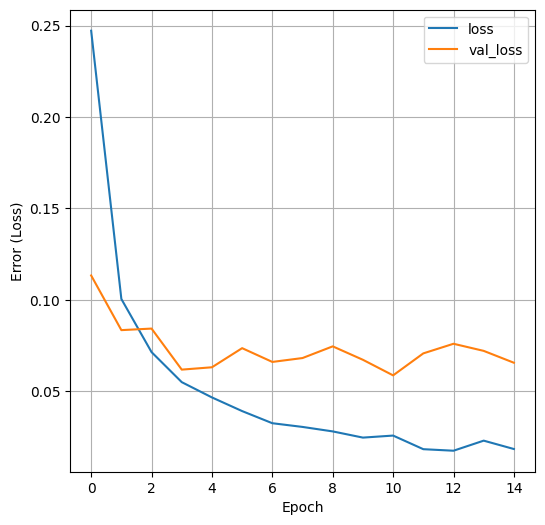

In [20]:
# Function to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

plot_loss(history)

## **Evaluate Model's Accuracy on Test Data**

In [21]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9850
Test score: 0.0656413584947586
Test accuracy: 0.9850000143051147


### **Inspecting the output**

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [22]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=-1) # we get probabilities for each of the class, and the argmax corresponds the class index with the highest probability

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 1ms/step


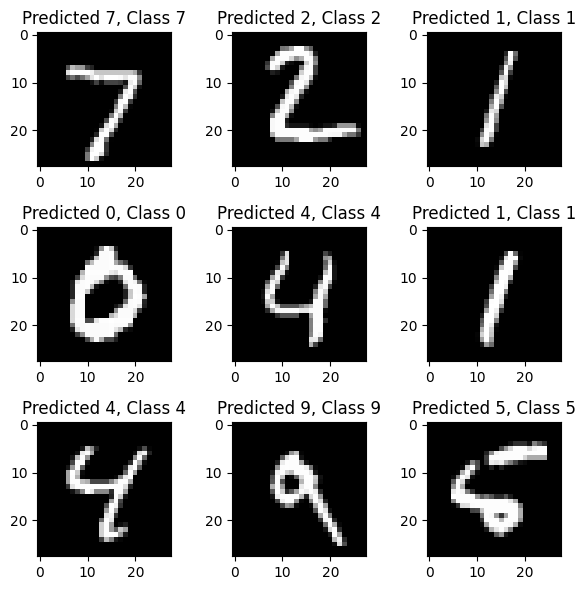

In [23]:
#@title
# Let us examine the Correctly labelled images
plt.rcParams['figure.figsize'] = (6,6) # Change these values to Make the figures bigger/smaller
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted {predicted_classes[correct]}, Class {y_test[correct]}")

plt.tight_layout()

**Let us exanine a few of incorrectly labelled images and think see if they the model's predictions are reasonable!**

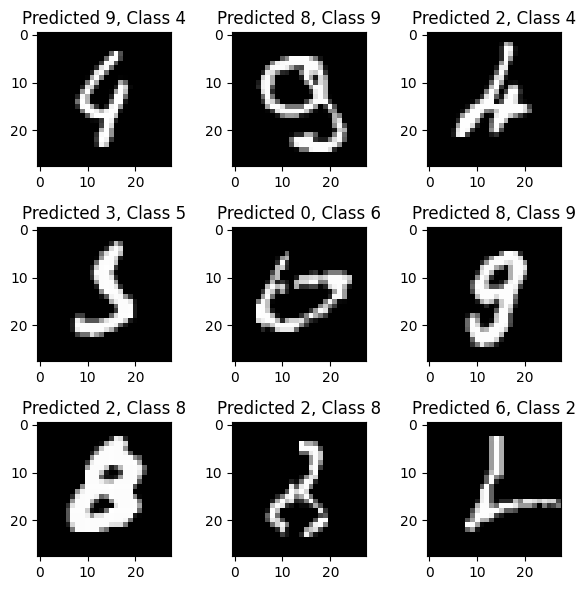

In [24]:
# Let us examine the InCorrectly  labelled images
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(f"Predicted {predicted_classes[incorrect]}, Class {y_test[incorrect]}")

plt.tight_layout()

**Some of these images are not clear enough, and we can have some Excuse for the model in misclassifying these!**

## **Trying experimenting with the batch size, Number of layers, number of nodes in each of the layers etc.!**

* How does increasing the batch size to 10,000 affect the training time and test accuracy?

* How about a batch size of 32?

## **Now that The model has been trained, we would like to save it, download it, load it and use it for future inferences.**

In [ ]:
from keras import models
# Save model
model.save("trained_model.h5")

# Load the saved model
saved_model = models.load_model('trained_model.h5')


In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1) # we get probabilities for each of the class, and the argmax corresponds the class index with the highest probability
predicted_classes_from_saved = np.argmax(saved_model.predict(X_test), axis=-1)
(predicted_classes == predicted_classes_from_saved).all()


313/313 [==============================] - 1s 2ms/step


True

***We can see that the Saved model's predictions match the Original model's prediction, confirming that we have been able to properly save and retrieve our model and it it works identically to the model trained on Google Colab!***